In [1]:
# Run this cell and select the kaggle.json file downloaded
# from the Kaggle account settings page.
from google.colab import files
files.upload()

KeyboardInterrupt: ignored

In [2]:
# Let's make sure the kaggle.json file is present.
!ls -lha kaggle.json

-rw-r--r-- 1 root root 65 Nov  1 15:59 kaggle.json


In [0]:
# Next, install the Kaggle API client.
!pip install -q kaggle

In [0]:
# The Kaggle API client expects this file to be in ~/.kaggle,
# so move it there.
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

# This permissions change avoids a warning on Kaggle tool startup.
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
# List available datasets.
!kaggle datasets list

ref                                                      title                                               size  lastUpdated          downloadCount  
-------------------------------------------------------  -------------------------------------------------  -----  -------------------  -------------  
xvivancos/transactions-from-a-bakery                     Transactions from a bakery                         113KB  2018-09-05 23:42:32           4695  
center-for-policing-equity/data-science-for-good         Data Science for Good: Center for Policing Equity   43MB  2018-10-24 00:27:12           1928  
lava18/google-play-store-apps                            Google Play Store Apps                               2MB  2018-09-18 20:49:49          12805  
olistbr/brazilian-ecommerce                              Brazilian E-Commerce Public Dataset by Olist        30MB  2018-10-25 19:46:13           1703  
martinellis/nhl-game-data                                NHL Game Data                  

In [5]:
!kaggle datasets download alxmamaev/flowers-recognition --unzip

 94% 211M/225M [00:02<00:00, 81.8MB/s]
100% 225M/225M [00:02<00:00, 98.4MB/s]


In [9]:

# %cd flowers
pwd

'/content/flowers'

In [1]:
import os
import matplotlib.pyplot as plt 

import os
allpaths = os.listdir("/content/flowers/")
pathnames = []
for i in range(5):
  pstr = '/content/flowers/'+allpaths[i]+'/'
  pathnames.append(pstr)
print(pathnames)

['/content/flowers/tulip/', '/content/flowers/sunflower/', '/content/flowers/dandelion/', '/content/flowers/daisy/', '/content/flowers/rose/']


In [2]:
allpaths

['tulip', 'sunflower', 'dandelion', 'daisy', 'rose']

In [64]:
import cv2
import glob

color_img_list = []
gray_img_list = []
img_labels = []

for i in range(5):
  newpath = pathnames[i]
  folder_imgs_color = []
  folder_imgs_gray = []
  imgs_here = glob.glob(newpath+'*.jpg')
  print(len(imgs_here))
  for j in range(len(imgs_here)):
    imname = imgs_here[j]
    color_img = cv2.imread(imname, 1)
    gray_img =  cv2.cvtColor(color_img, cv2.COLOR_BGR2GRAY)
    resized_color_image = cv2.resize(color_img, (120, 120)) 
    resized_gray_image = cv2.resize(gray_img, (120, 120)) 
    folder_imgs_color.append(resized_color_image)
    folder_imgs_gray.append(resized_gray_image)
    img_labels.append(str(allpaths[i]))
 
  color_img_list.append(folder_imgs_color)
  gray_img_list.append(folder_imgs_gray)


984
734
1052
769
784


In [65]:
len(img_labels)
start_indices = []
indsum = 0
start_indices.append(indsum)
for i in range(len(color_img_list)-1):
  indsum = indsum+len(color_img_list[i])
  start_indices.append(indsum)

start_indices

[0, 984, 1718, 2770, 3539]

img_size = (120, 120, 3)
img_size = (120, 120)


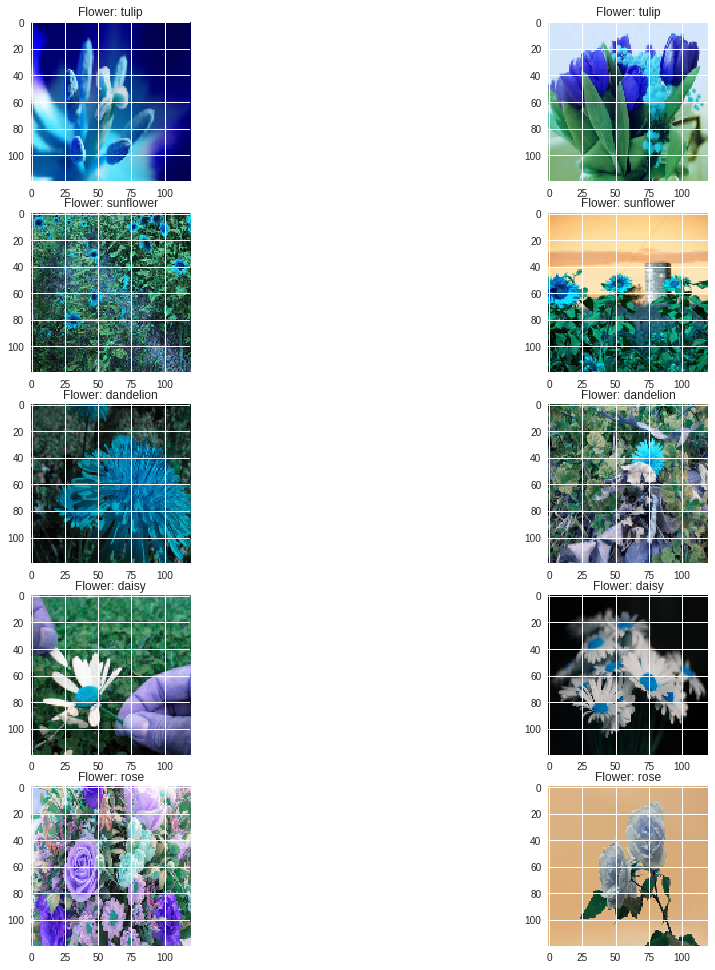

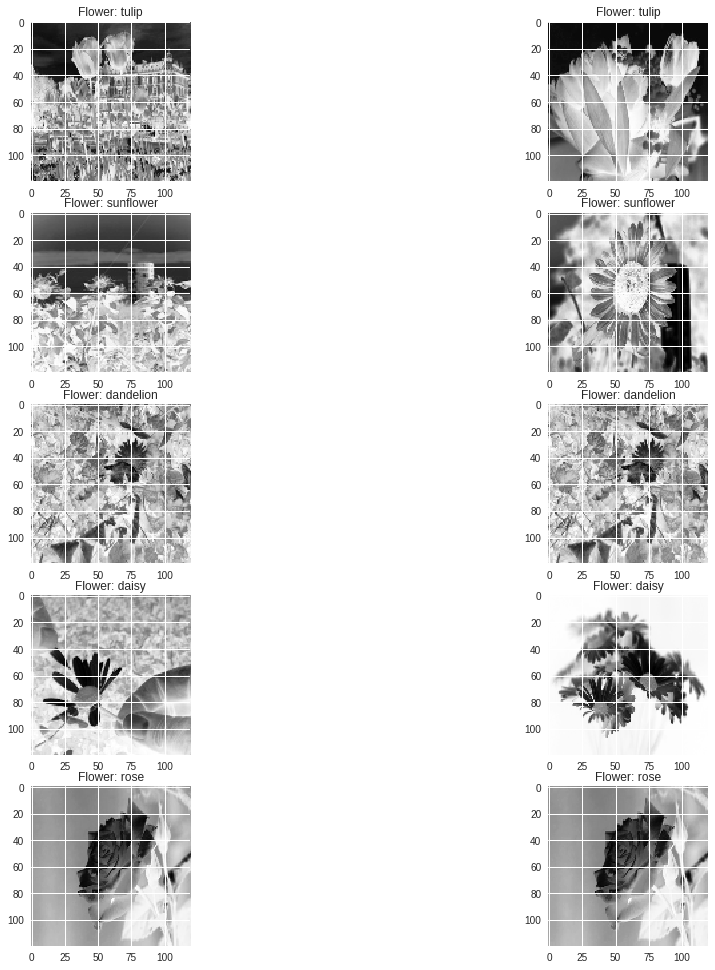

In [67]:
import random as rn

# preview of some resized color images
fig,ax=plt.subplots(5,2)
fig.set_size_inches(17,17)

for i in range(5):
    for j in range (2):
        l=rn.randint(0,len(color_img_labels[i]))
        ax[i,j].imshow(color_img_list[i][l])
        ax[i,j].set_title('Flower: '+img_labels[start_indices[i]+l])
print('img_size = '+str(color_img_list[4][59].shape) )


# preview of some resized gray images
fig,ax=plt.subplots(5,2)
fig.set_size_inches(17,17)

for i in range(5):
    for j in range (2):
        l=rn.randint(0,len(img_labels[i]))
        ax[i,j].imshow(gray_img_list[i][l])
        ax[i,j].set_title('Flower: '+img_labels[start_indices[i]+l])
print('img_size = '+str(gray_img_list[4][59].shape) )

In [0]:
#mapping labels
for i in range(len(img_labels)):
    img_labels[i][j] = i
    


In [69]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,roc_curve,roc_auc_score
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical

lab_en=LabelEncoder()

Y=lab_en.fit_transform(img_labels)               #overall img labels
Y=to_categorical(Y,5)  

X_color = []
X_gray= []
for i in range(len(color_img_list)):
  for j in range(len(color_img_list[i])):
    
    X_color.append(color_img_list[i][j])
    X_gray.append(gray_img_list[i][j])

X_color = np.array(X_color)
X_color=X_color/255                                           #overall img data

X_gray = np.array(X_gray)
X_gray=X_gray/255  


(4323, 120, 120)

In [0]:
idx = np.random.permutation(len(X_color))
xc,yc, xg, yg = X_color[idx], Y[idx], X_gray[idx], Y[idx]

split = int(len(X_color)/11)

xtrain_c = xc[:9*split]
xtest_c = xc[9*split:10*split]
xdev_c = xc[10*split:]

xtrain_g = xg[:9*split]
xtest_g= xg[9*split:10*split]
xdev_g= xg[10*split:]
                              #randomly shuffled splits into training, test and development sets
ytrain_c = yc[:9*split]
ytest_c = yc[9*split:10*split]
ydev_c = yc[10*split:]

print(len(xtrain_c))
print(len(xtest_c))
print(len(xdev_c))
print(len(xtrain_g))
print(len(xtest_g))
print(len(xdev_g))
print(len(ytrain_c))
print(len(ytest_c))
print(len(ydev_c))


In [74]:
#the CNN model
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam,SGD, rmsprop

# specifically for cnn
from keras.layers import Dropout, Flatten,Activation
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization


model = Sequential()
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',activation ='relu', input_shape = (120,120,3)))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))


model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(5, activation = "softmax"))


model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 120, 120, 32)      2432      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 60, 60, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 60, 60, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 57600)             0         
_________________________________________________________________
dense_5 (Dense)              (None, 512)               29491712  
_________________________________________________________________
activation_3 (Activation)    (None, 512)               0         
__________

In [75]:
batch_size = 256
epochs = 5

history = model.fit(xtrain_c, ytrain_c, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(xtest_c, ytest_c))
 
model.evaluate(xdev_c, ydev_c)

Train on 3537 samples, validate on 393 samples
Epoch 1/5
3537/3537 [==============================] - 166s 47ms/step - loss: 5.6811 - acc: 0.2677 - val_loss: 1.5587 - val_acc: 0.3028
Epoch 2/5
3537/3537 [==============================] - 162s 46ms/step - loss: 1.3986 - acc: 0.4150 - val_loss: 1.3486 - val_acc: 0.4504
Epoch 3/5
3537/3537 [==============================] - 161s 46ms/step - loss: 1.4331 - acc: 0.4416 - val_loss: 1.3222 - val_acc: 0.4453
Epoch 4/5
3537/3537 [==============================] - 157s 44ms/step - loss: 1.1262 - acc: 0.5753 - val_loss: 1.6746 - val_acc: 0.3995
Epoch 5/5
393/393 [==============================] - 6s 15ms/step


[1.1082065020505405, 0.5623409672244511]

ground truth: daisy
prediction: daisy


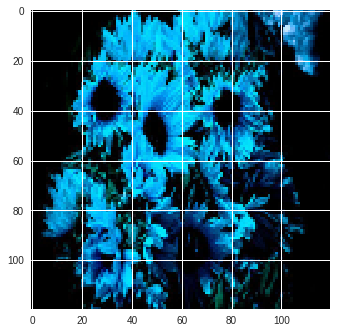

ground truth: daisy
prediction: daisy


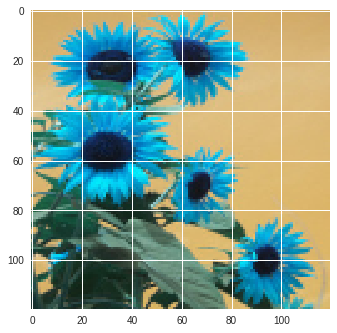

ground truth: dandelion
prediction: dandelion


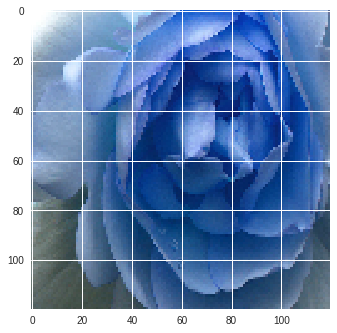

ground truth: rose
prediction: dandelion


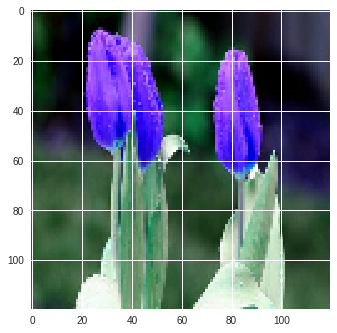

ground truth: rose
prediction: dandelion


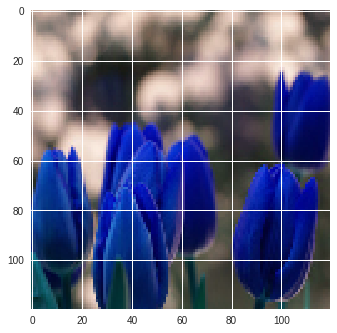

ground truth: sunflower
prediction: sunflower


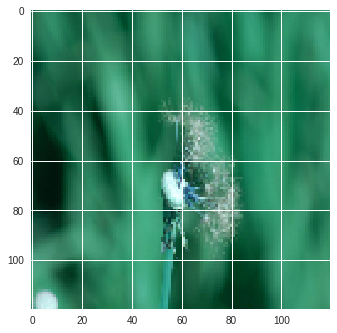

ground truth: sunflower
prediction: sunflower


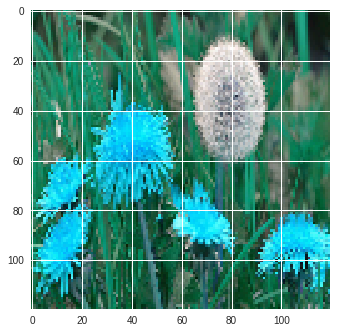

ground truth: rose
prediction: dandelion


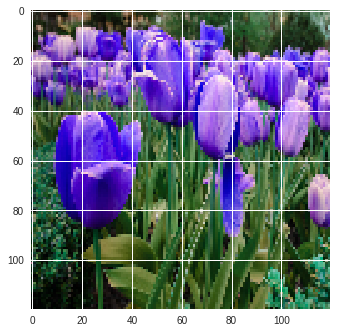

ground truth: daisy
prediction: daisy


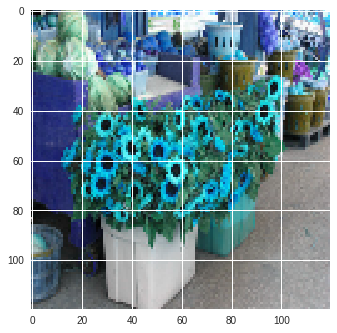

ground truth: daisy
prediction: daisy


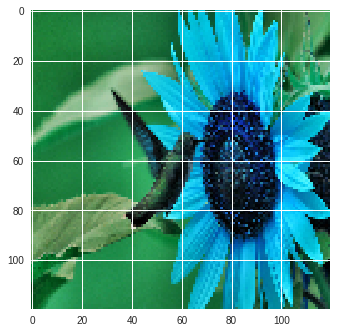

In [85]:
predictions = model.predict(xtest_c)

for i in range(10):
        l=rn.randint(0,len(xtest_c))
        print('ground truth: '+allpaths[np.argmax(ytest_c[l])])
        print('prediction: '+allpaths[np.argmax(predictions[l])])
        plt.imshow(xtest_c[l])
        plt.show()
